# Data without Delayed

In [1]:
import pandas as pd

data  = pd.read_csv("../Data/Combined.csv")
print(data.head())

         Date                                  Tweets_clean_more  polarity  \
0  2013-01-10  to super clear i dont wish could i mandat anyt...  0.216667   
1  2019-01-10  ye get regulatori pushback may avail region go...  0.123333   
2  2020-01-10  dome barrel weld made bar pretti good bar need...  0.411111   
3  2012-01-11  the exec conf room tesla use call denali i dec...  0.600000   
4  2016-01-11                    sad hear david bowi die he amaz -0.500000   

   subjectivity sentiment     Label  
0      0.525000  positive  Decrease  
1      0.490556  positive  Increase  
2      0.570988  positive  Decrease  
3      1.000000  positive  Increase  
4      1.000000  negative  Decrease  


In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Tweets_clean_more'], data['Label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_list = X_train.to_list()
X_test_list = X_test.to_list()
vectorizer.fit(X_train_list)
vectorizer.fit(X_test_list)
X_train_clean = vectorizer.transform(X_train_list)
X_test_clean = vectorizer.transform(X_test_list)

X_train_array = X_train_clean.toarray()
X_test_array = X_test_clean.toarray()

#X_train_counts = vectorizer.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_array, y_train)
Y_pred = clf.predict(X_test_array)

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

print("Accuracy:", accuracy_score(y_test, Y_pred))
print("F1 Score:", f1_score(y_test, Y_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_test, Y_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_test, Y_pred))
print("Classification Report:", classification_report(y_test, Y_pred))

Accuracy: 0.40350877192982454
F1 Score: 0.40350877192982454
ROC AUC Score: 0.5526315789473684
Confusion Matrix: [[66 77  6]
 [81 47  3]
 [ 2  1  2]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.44      0.44      0.44       149
    Increase       0.38      0.36      0.37       131
   No Change       0.18      0.40      0.25         5

    accuracy                           0.40       285
   macro avg       0.33      0.40      0.35       285
weighted avg       0.41      0.40      0.40       285



In [5]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train_array, y_train)
Y_pred = clf.predict(X_test_array)

print("Accuracy:", accuracy_score(y_test, Y_pred))
print("F1 Score:", f1_score(y_test, Y_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_test, Y_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_test, Y_pred))
print("Classification Report:", classification_report(y_test, Y_pred))

Accuracy: 0.43859649122807015
F1 Score: 0.43859649122807015
ROC AUC Score: 0.5789473684210527
Confusion Matrix: [[80 64  5]
 [83 44  4]
 [ 2  2  1]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.48      0.54      0.51       149
    Increase       0.40      0.34      0.37       131
   No Change       0.10      0.20      0.13         5

    accuracy                           0.44       285
   macro avg       0.33      0.36      0.34       285
weighted avg       0.44      0.44      0.44       285



In [6]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB().fit(X_train_array, y_train)
Y_pred = clf.predict(X_test_array)

print("Accuracy:", accuracy_score(y_test, Y_pred))
print("F1 Score:", f1_score(y_test, Y_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_test, Y_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_test, Y_pred))
print("Classification Report:", classification_report(y_test, Y_pred))

Accuracy: 0.42105263157894735
F1 Score: 0.42105263157894735
ROC AUC Score: 0.5657894736842105
Confusion Matrix: [[88 49 12]
 [90 32  9]
 [ 5  0  0]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.48      0.59      0.53       149
    Increase       0.40      0.24      0.30       131
   No Change       0.00      0.00      0.00         5

    accuracy                           0.42       285
   macro avg       0.29      0.28      0.28       285
weighted avg       0.43      0.42      0.42       285



In [7]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB().fit(X_train_array, y_train)
Y_pred = clf.predict(X_test_array)

print("Accuracy:", accuracy_score(y_test, Y_pred))
print("F1 Score:", f1_score(y_test, Y_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_test, Y_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_test, Y_pred))
print("Classification Report:", classification_report(y_test, Y_pred))

Accuracy: 0.26666666666666666
F1 Score: 0.26666666666666666
ROC AUC Score: 0.44999999999999996
Confusion Matrix: [[41 60 48]
 [60 33 38]
 [ 3  0  2]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.39      0.28      0.32       149
    Increase       0.35      0.25      0.29       131
   No Change       0.02      0.40      0.04         5

    accuracy                           0.27       285
   macro avg       0.26      0.31      0.22       285
weighted avg       0.37      0.27      0.31       285



# Data Delayed 2 Days

In [8]:
data_delayed = pd.read_csv("../Data/Combined_Delayed_2Days.csv")

In [9]:
X_Delayed_train, X_Delayed_test, y_Delayed_train, y_Delayed_test = train_test_split(data_delayed['Tweets_clean_more'], data_delayed['Label_delayed_2Days'], test_size=0.2, random_state=42)

X_Delayed_train_list = X_Delayed_train.to_list()
X_Delayed_test_list = X_Delayed_test.to_list()
vectorizer.fit(X_Delayed_train_list)
vectorizer.fit(X_Delayed_test_list)
X_Delayed_train_clean = vectorizer.transform(X_Delayed_train_list)
X_Delayed_test_clean = vectorizer.transform(X_Delayed_test_list)

X_Delayed_train_array = X_Delayed_train_clean.toarray()
X_Delayed_test_array = X_Delayed_test_clean.toarray()

In [14]:
clf = MultinomialNB().fit(X_Delayed_train_array, y_Delayed_train)
Y_Delayed_pred = clf.predict(X_Delayed_test_array)
cm_multi = confusion_matrix(y_Delayed_test, Y_Delayed_pred)

print("Output of MultinomialNB with delayed 2 days data")
print("Accuracy:", accuracy_score(y_Delayed_test, Y_Delayed_pred))
print("F1 Score:", f1_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_Delayed_test, Y_Delayed_pred))
print("Classification Report:", classification_report(y_Delayed_test, Y_Delayed_pred))

Output of MultinomialNB with delayed 2 days data
Accuracy: 0.49295774647887325
F1 Score: 0.49295774647887325
ROC AUC Score: 0.619718309859155
Confusion Matrix: [[70 64  9]
 [56 70 10]
 [ 5  0  0]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.53      0.49      0.51       143
    Increase       0.52      0.51      0.52       136
   No Change       0.00      0.00      0.00         5

    accuracy                           0.49       284
   macro avg       0.35      0.33      0.34       284
weighted avg       0.52      0.49      0.51       284



Classification Report:
              precision    recall  f1-score   support

    Decrease       0.53      0.49      0.51       143
    Increase       0.52      0.51      0.52       136
   No Change       0.00      0.00      0.00         5

    accuracy                           0.49       284
   macro avg       0.35      0.33      0.34       284
weighted avg       0.52      0.49      0.51       284



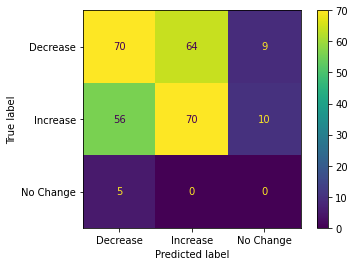

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=clf.classes_)
disp.plot()
print("Classification Report:")
print(classification_report(y_Delayed_test, Y_Delayed_pred))

In [11]:
clf = GaussianNB().fit(X_Delayed_train_array, y_Delayed_train)
Y_Delayed_pred = clf.predict(X_Delayed_test_array)

print("Output of GaussianNB with delayed 2 days data")
print("Accuracy:", accuracy_score(y_Delayed_test, Y_Delayed_pred))
print("F1 Score:", f1_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_Delayed_test, Y_Delayed_pred))
print("Classification Report:", classification_report(y_Delayed_test, Y_Delayed_pred))

Output of GaussianNB with delayed 2 days data
Accuracy: 0.45774647887323944
F1 Score: 0.45774647887323944
ROC AUC Score: 0.5933098591549296
Confusion Matrix: [[53 86  4]
 [52 77  7]
 [ 3  2  0]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.49      0.37      0.42       143
    Increase       0.47      0.57      0.51       136
   No Change       0.00      0.00      0.00         5

    accuracy                           0.46       284
   macro avg       0.32      0.31      0.31       284
weighted avg       0.47      0.46      0.46       284



In [12]:
clf = BernoulliNB().fit(X_Delayed_train_array, y_Delayed_train)
Y_Delayed_pred = clf.predict(X_Delayed_test_array)

print("Output of BernoulliNB with delayed 2 days data")
print("Accuracy:", accuracy_score(y_Delayed_test, Y_Delayed_pred))
print("F1 Score:", f1_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_Delayed_test, Y_Delayed_pred))
print("Classification Report:", classification_report(y_Delayed_test, Y_Delayed_pred))

Output of BernoulliNB with delayed 2 days data
Accuracy: 0.4612676056338028
F1 Score: 0.4612676056338028
ROC AUC Score: 0.5959507042253521
Confusion Matrix: [[ 30  96  17]
 [ 23 100  13]
 [  1   3   1]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.56      0.21      0.30       143
    Increase       0.50      0.74      0.60       136
   No Change       0.03      0.20      0.06         5

    accuracy                           0.46       284
   macro avg       0.36      0.38      0.32       284
weighted avg       0.52      0.46      0.44       284



In [13]:
clf = ComplementNB().fit(X_Delayed_train_array, y_Delayed_train)
Y_Delayed_pred = clf.predict(X_Delayed_test_array)

print("Output of ComplementNB with delayed 2 days data")
print("Accuracy:", accuracy_score(y_Delayed_test, Y_Delayed_pred))
print("F1 Score:", f1_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("ROC AUC Score:", multiclass_roc_auc_score(y_Delayed_test, Y_Delayed_pred, average='micro'))
print("Confusion Matrix:", confusion_matrix(y_Delayed_test, Y_Delayed_pred))
print("Classification Report:", classification_report(y_Delayed_test, Y_Delayed_pred))

Output of ComplementNB with delayed 2 days data
Accuracy: 0.35563380281690143
F1 Score: 0.35563380281690143
ROC AUC Score: 0.5167253521126761
Confusion Matrix: [[53 48 42]
 [46 47 43]
 [ 4  0  1]]
Classification Report:               precision    recall  f1-score   support

    Decrease       0.51      0.37      0.43       143
    Increase       0.49      0.35      0.41       136
   No Change       0.01      0.20      0.02         5

    accuracy                           0.36       284
   macro avg       0.34      0.31      0.29       284
weighted avg       0.50      0.36      0.41       284

